<a href="https://colab.research.google.com/github/Shamiul-693/Predicting-Cryptocurrency-Prices/blob/main/Predicting_Cryptocurrency_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Predicting Cryptocurrency Prices/Bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2019-06-18,9128.269531,9149.763672,8988.606445,9062.045898,952850.0,USD
1,2019-06-19,9068.174805,9277.677734,9051.094727,9271.459961,131077.0,USD
2,2019-06-20,9271.567383,9573.689453,9209.416992,9519.200195,83052.0,USD
3,2019-06-21,9526.833984,10130.935547,9526.833984,10127.998047,76227.0,USD
4,2019-06-22,10151.890625,11171.013672,10083.189453,10719.981445,84485.0,USD


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,1151.000000,1151.000000,1151.000000,1151.000000,1.151000e+03
mean,26488.652992,27528.416710,25416.606967,26496.733082,2.874051e+07
std,17963.101635,18432.925246,17484.604545,17952.113609,5.202999e+07
min,4943.832520,5338.512695,0.076853,4936.755371,0.000000e+00
25%,9706.758301,10090.012695,9360.636230,9712.636719,7.495500e+03
50%,20873.337891,21867.822266,20245.201172,20902.404297,1.864334e+06
75%,41782.333984,42749.439453,40890.394531,41782.333984,4.076471e+07
max,67470.437500,85563.984375,66072.343750,67502.421875,5.791706e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB


In [6]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


In [7]:
print(df.isnull().sum())   # Count missing values per column


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


## Summary statistics

In [8]:

print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())


               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%    41782.333984  42749.439453  40890.394531  41782.333984  4.076471e+07
max    67470.437500  85563.984375  66072.343750  67502.421875  5.791706e+08


# Correlation matrix

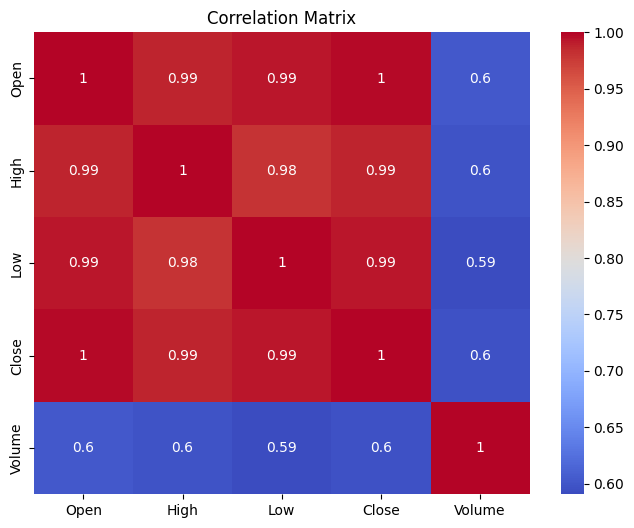

In [9]:
# Correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Consider creating additional time-series features to improve the model

In [10]:
# Moving averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['14_day_MA'] = df['Close'].rolling(window=14).mean()

# Daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Volatility
df['Volatility'] = df['High'] - df['Low']

print(df.head())


         Date          Open          High           Low         Close  \
0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  7_day_MA  14_day_MA  Daily_Return   Volatility  
0  952850.0      USD       NaN        NaN           NaN   161.157227  
1  131077.0      USD       NaN        NaN      0.023109   226.583008  
2   83052.0      USD       NaN        NaN      0.026721   364.272461  
3   76227.0      USD       NaN        NaN      0.063955   604.101562  
4   84485.0      USD       NaN        NaN      0.058450  1087.824219  


#Visualize the price data over time series to identify trends, seasonality, and potential outliers.

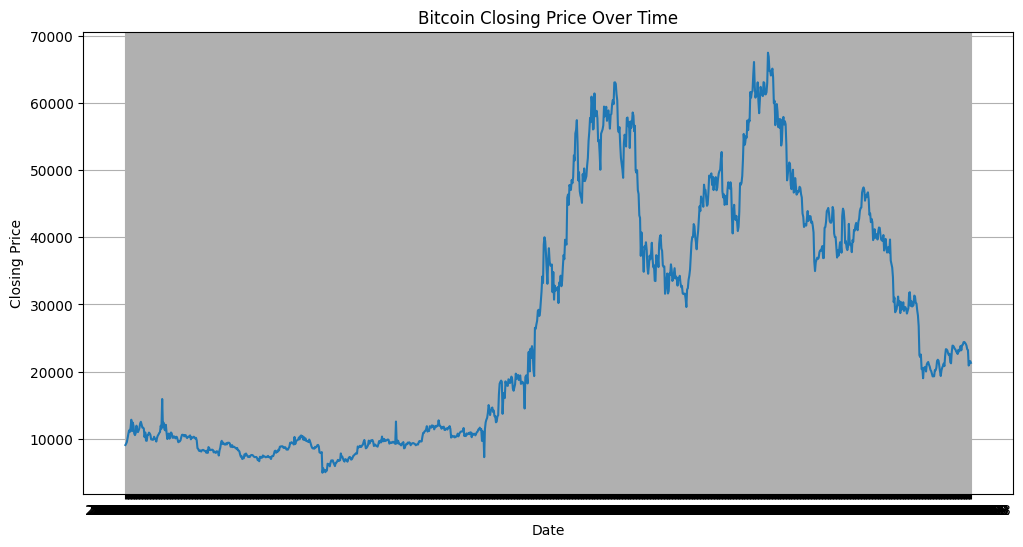

In [11]:


# Visualize closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.grid(True)
plt.show()


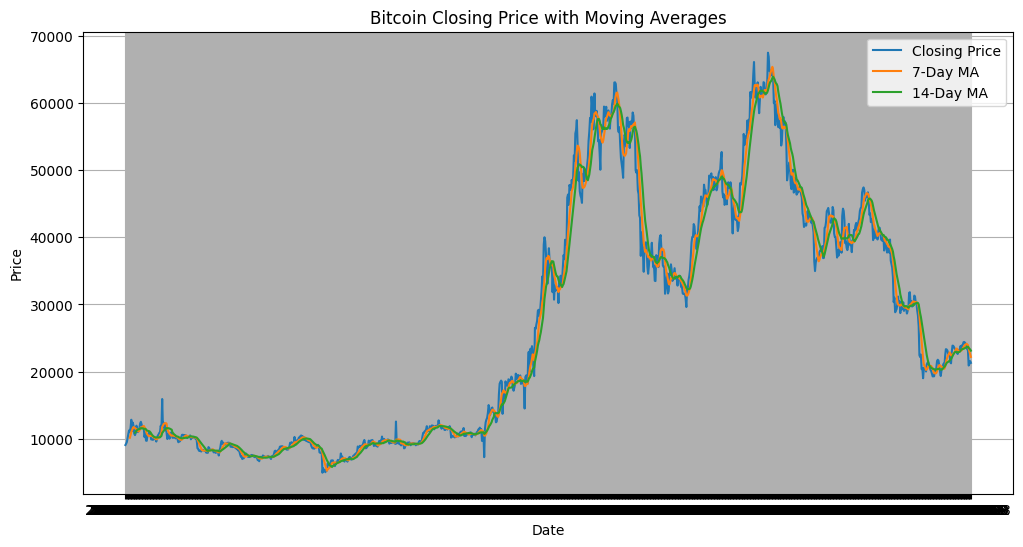

In [12]:
# Visualize moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.plot(df['Date'], df['7_day_MA'], label='7-Day MA')
plt.plot(df['Date'], df['14_day_MA'], label='14-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

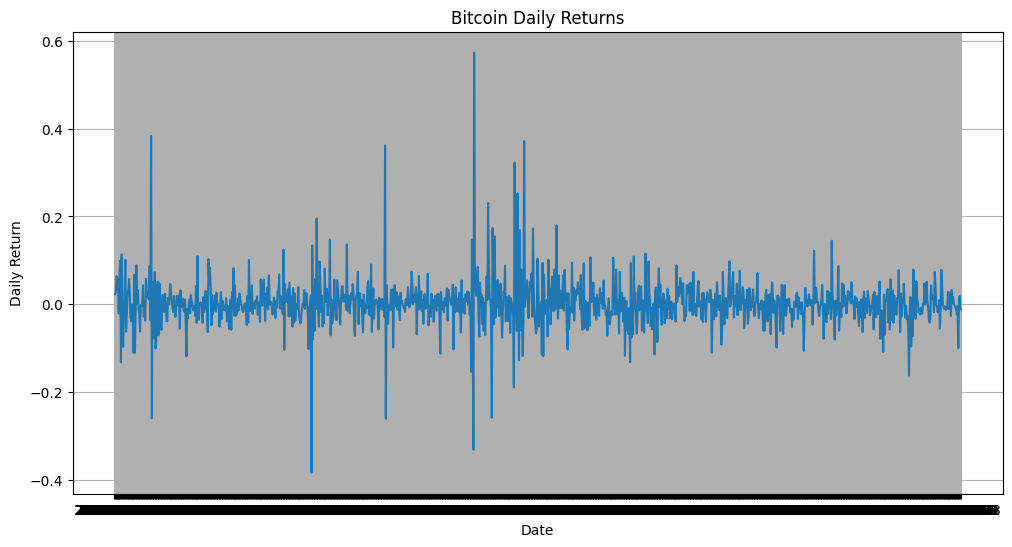

In [13]:
# Visualize daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'])
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Bitcoin Daily Returns')
plt.grid(True)
plt.show()

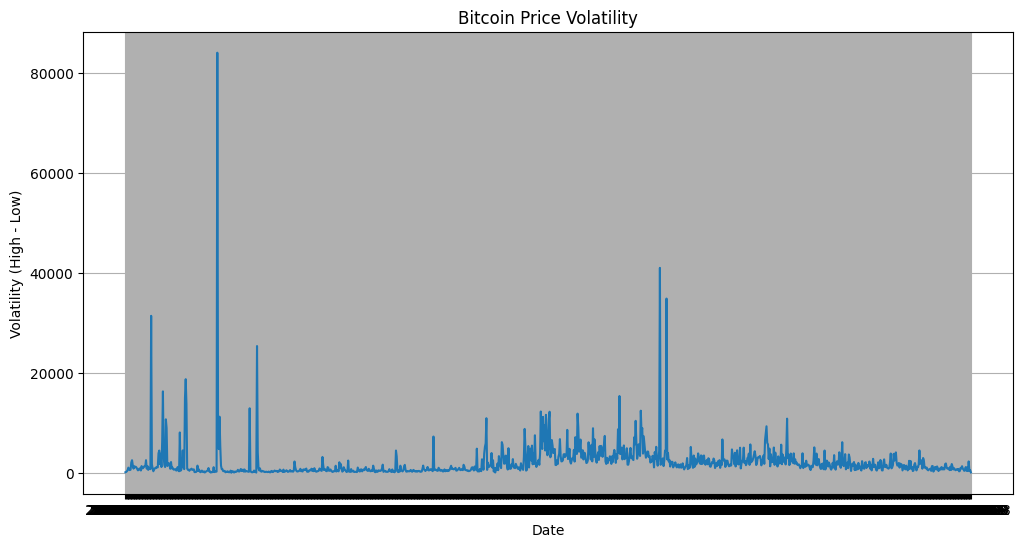

In [14]:
# Visualize volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility (High - Low)')
plt.title('Bitcoin Price Volatility')
plt.grid(True)
plt.show()

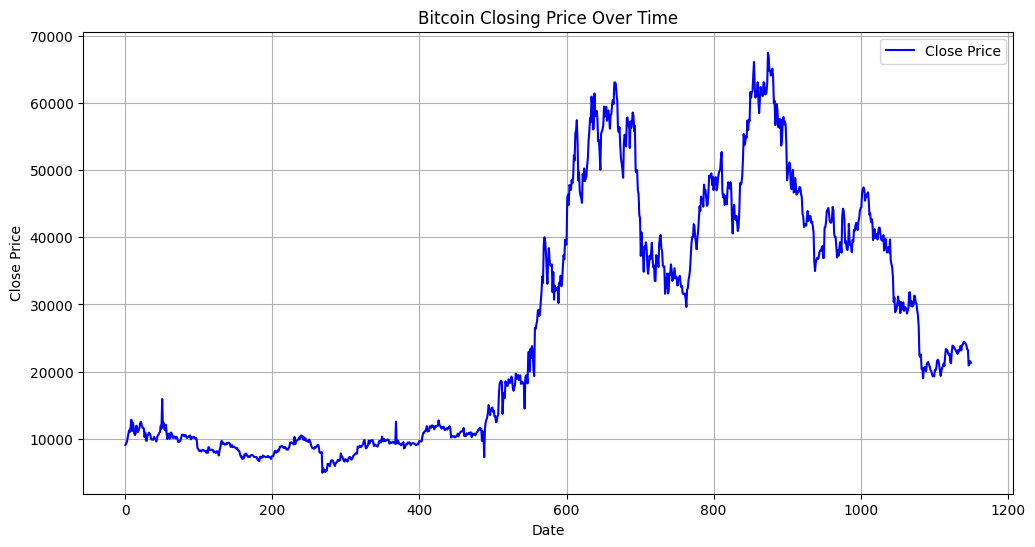

In [15]:
import matplotlib.pyplot as plt

# Plot the Close price over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


#trends

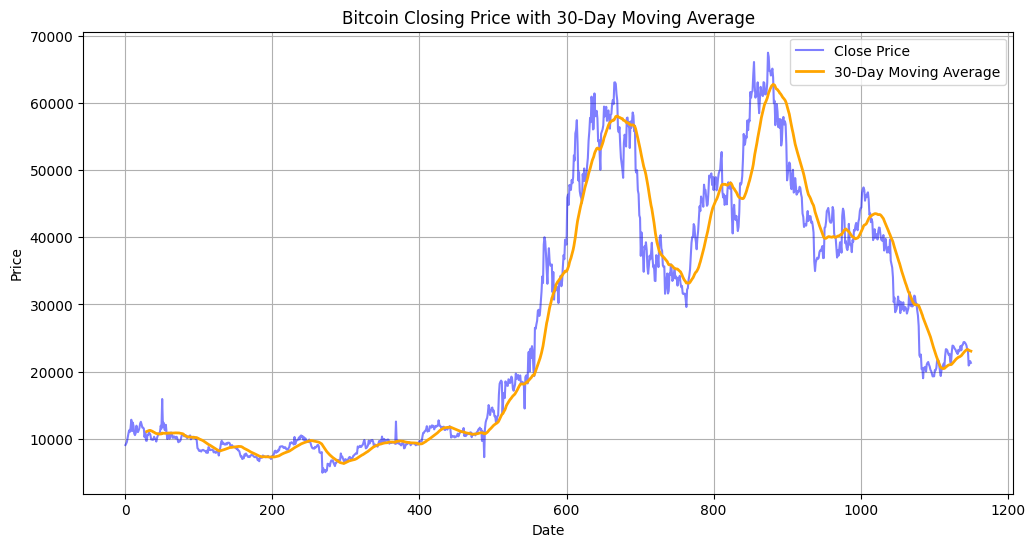

In [16]:
# Calculate a 30-day moving average
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Plot Close price with the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df.index, df['30_day_MA'], label='30-Day Moving Average', color='orange', linewidth=2)
plt.title('Bitcoin Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Identify Seasonality

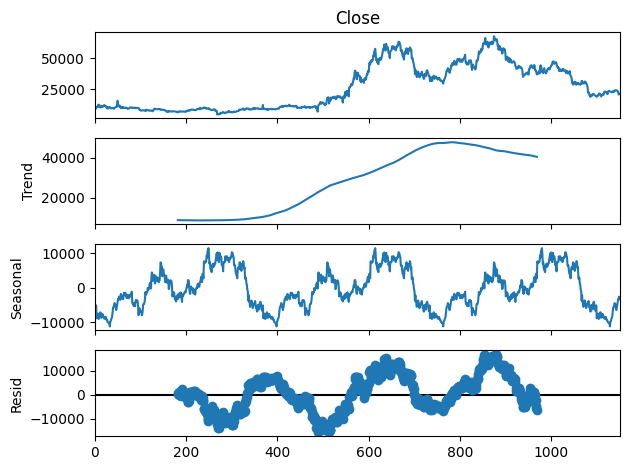

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'], model='additive', period=365)

# Plot the decomposition
result.plot()
plt.show()


#Calculate descriptive statistics for numerical features (mean, median, standard deviation) and analyze categorical features (frequency distribution).

In [18]:
# Descriptive statistics for numerical features
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Calculate statistics
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
std_values = df[numerical_columns].std()

# Display the results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation:\n", std_values)

# Summary statistics (includes more details like min, max, etc.)
print("\nSummary Statistics:\n", df[numerical_columns].describe())


Mean Values:
 Open      2.648865e+04
High      2.752842e+04
Low       2.541661e+04
Close     2.649673e+04
Volume    2.874051e+07
dtype: float64

Median Values:
 Open      2.087334e+04
High      2.186782e+04
Low       2.024520e+04
Close     2.090240e+04
Volume    1.864334e+06
dtype: float64

Standard Deviation:
 Open      1.796310e+04
High      1.843293e+04
Low       1.748460e+04
Close     1.795211e+04
Volume    5.202999e+07
dtype: float64

Summary Statistics:
                Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%

In [19]:
# Frequency distribution for the 'Currency' column
if 'Currency' in df.columns:
    currency_distribution = df['Currency'].value_counts()
    print("\nFrequency Distribution of Currency:\n", currency_distribution)
else:
    print("No categorical columns found.")



Frequency Distribution of Currency:
 Currency
USD    1151
Name: count, dtype: int64


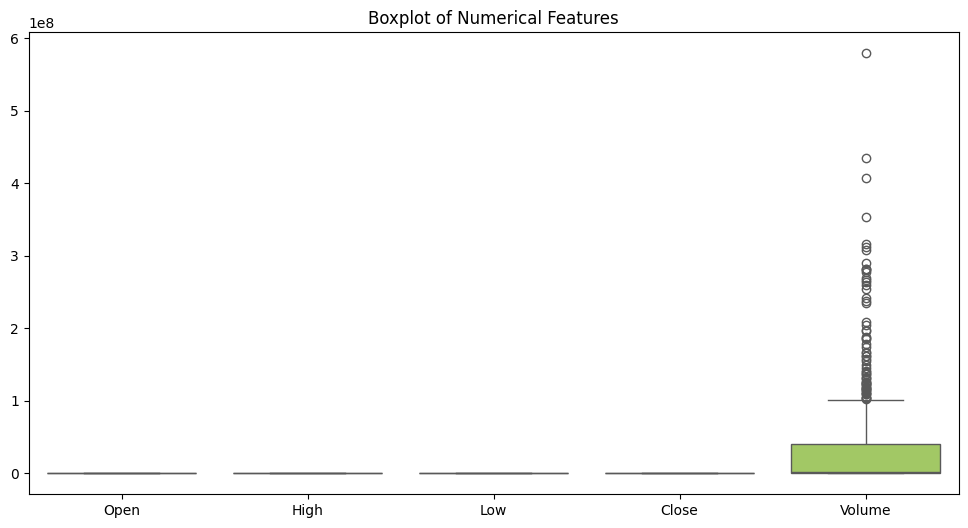

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.show()


#Data Preprocessing (LO2):

#Define the Target Variable

In [21]:
eth_df = pd.read_csv("/content/drive/MyDrive/Predicting Cryptocurrency Prices/ethereum.csv")

In [22]:
eth_df.head()

,date,Open,High,Low,Close,price,Currency
0,3/10/2016,11.20,11.85,11.07,11.75,4,USD
1,3/11/2016,11.75,11.95,11.75,11.95,179,USD
2,3/12/2016,11.95,13.45,11.95,12.92,833,USD
3,3/13/2016,12.92,15.07,12.92,15.07,1295,USD
4,3/14/2016,15.07,15.07,11.40,12.50,92183,USD


In [23]:
eth_df['date'] = pd.to_datetime(eth_df['date'])

In [24]:

print(eth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2358 non-null   datetime64[ns]
 1   Open      2358 non-null   float64       
 2   High      2358 non-null   float64       
 3   Low       2358 non-null   float64       
 4   Close     2358 non-null   float64       
 5   price     2358 non-null   int64         
 6   Currency  2358 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 129.1+ KB
None


#Merge Bitcoin and Ethereum Datasets

In [44]:
# Ensure both datasets have consistent date formatting
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column in df to datetime
eth_df['Date'] = pd.to_datetime(eth_df['Date'])# Convert 'Date' column in df to datetime
df.reset_index(inplace=True, drop=True)  # Add drop=True to avoid the error
eth_df.rename(columns={'date': 'Date'}, inplace=True)

# Merge the datasets on 'Date'
merged_df = pd.merge(df, eth_df[['Date', 'Close']], on='Date', how='inner', suffixes=('_Bitcoin', '_Ethereum'))

# Preview the merged dataset
print(merged_df.head())

   level_0  index       Date          Open          High           Low  \
0        0      0 2019-06-18   9128.269531   9149.763672   8988.606445   
1        1      1 2019-06-19   9068.174805   9277.677734   9051.094727   
2        2      2 2019-06-20   9271.567383   9573.689453   9209.416992   
3        3      3 2019-06-21   9526.833984  10130.935547   9526.833984   
4        4      4 2019-06-22  10151.890625  11171.013672  10083.189453   

   Close_Bitcoin    Volume Currency  7_day_MA  14_day_MA  Daily_Return  \
0    9062.045898  952850.0      USD       NaN        NaN           NaN   
1    9271.459961  131077.0      USD       NaN        NaN      0.023109   
2    9519.200195   83052.0      USD       NaN        NaN      0.026721   
3   10127.998047   76227.0      USD       NaN        NaN      0.063955   
4   10719.981445   84485.0      USD       NaN        NaN      0.058450   

    Volatility  30_day_MA  Close_Ethereum  
0   161.157227        NaN          264.59  
1   226.583008        

#Define Target Variables

In [46]:
# Define target variables for the next time window
merged_df['Bitcoin_Target'] = merged_df['Close_Bitcoin'].shift(-1)  # Next day's Bitcoin price
merged_df['Ethereum_Target'] = merged_df['Close_Ethereum'].shift(-1)  # Next day's Ethereum price

# Drop the last row (due to NaN targets caused by shifting)
merged_df.dropna(inplace=True)

# Preview the dataset with target variables
print(merged_df[['Date', 'Close_Bitcoin', 'Bitcoin_Target', 'Close_Ethereum', 'Ethereum_Target']].head())


         Date  Close_Bitcoin  Bitcoin_Target  Close_Ethereum  Ethereum_Target
29 2019-07-17    9685.883789    10548.814453          210.95           225.23
30 2019-07-18   10548.814453    10572.655273          225.23           220.09
31 2019-07-19   10572.655273    10913.607422          220.09           227.86
32 2019-07-20   10913.607422    10792.991211          227.86           225.01
33 2019-07-21   10792.991211    10556.007812          225.01           217.27


# Feature-Target Split

In [47]:
# Rename columns for consistency
merged_df.rename(columns={
    'Open': 'Open_Ethereum',
    'High': 'High_Ethereum',
    'Low': 'Low_Ethereum',
    'price': 'Price_Ethereum'
}, inplace=True)

# Ensure Bitcoin columns are properly named
if 'Open' in merged_df.columns and 'High' in merged_df.columns:
    merged_df.rename(columns={
        'Open': 'Open_Bitcoin',
        'High': 'High_Bitcoin',
        'Low': 'Low_Bitcoin',
    }, inplace=True)

# Verify the updated column names
print("Updated Columns in merged_df:\n", merged_df.columns)


Updated Columns in merged_df:
 Index(['level_0', 'index', 'Date', 'Open_Ethereum', 'High_Ethereum',
       'Low_Ethereum', 'Close_Bitcoin', 'Volume', 'Currency', '7_day_MA',
       '14_day_MA', 'Daily_Return', 'Volatility', '30_day_MA',
       'Close_Ethereum', 'Bitcoin_Target', 'Ethereum_Target'],
      dtype='object')


In [48]:
# Define the features based on the updated column names
features = ['Open_Bitcoin', 'High_Bitcoin', 'Low_Bitcoin', 'Volume',  # Bitcoin features
            'Close_Ethereum', 'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Price_Ethereum']  # Ethereum features

# Check if all features exist in the DataFrame
missing_features = [feature for feature in features if feature not in merged_df.columns]
if missing_features:
    print("Missing Features:", missing_features)
else:
    print("All features are present!")


Missing Features: ['Open_Bitcoin', 'High_Bitcoin', 'Low_Bitcoin', 'Price_Ethereum']


In [49]:
# Define features and targets
features = ['Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Volume',  # Bitcoin features #Changed Open_Bitcoin, High_Bitcoin, Low_Bitcoin to Open_Ethereum, High_Ethereum, Low_Ethereum
            'Close_Ethereum', 'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum']  # Ethereum features #Removed Price_Ethereum

target = ['Bitcoin_Target', 'Ethereum_Target']

X = merged_df[features]
y = merged_df[target]

print("Features Shape:", X.shape)
print("Targets Shape:", y.shape)

Features Shape: (1120, 8)
Targets Shape: (1120, 2)


#Select relevant features based on the exploration phase. Consider feature engineering techniques to create new features from existing ones (e.g., price change, price spread).

In [50]:
# Price change for Bitcoin and Ethereum
merged_df['Bitcoin_Price_Change'] = merged_df['Close_Bitcoin'] - merged_df['Open_Ethereum']  # Changed 'Open_Bitcoin' to 'Open_Ethereum'
merged_df['Ethereum_Price_Change'] = merged_df['Close_Ethereum'] - merged_df['Open_Ethereum']

In [51]:
# 7-day moving average for Bitcoin and Ethereum
merged_df['Bitcoin_MA_7d'] = merged_df['Close_Bitcoin'].rolling(window=7).mean()
merged_df['Ethereum_MA_7d'] = merged_df['Close_Ethereum'].rolling(window=7).mean()

# 30-day moving average for Bitcoin and Ethereum
merged_df['Bitcoin_MA_30d'] = merged_df['Close_Bitcoin'].rolling(window=30).mean()
merged_df['Ethereum_MA_30d'] = merged_df['Close_Ethereum'].rolling(window=30).mean()


In [52]:
import numpy as np

# Calculate log returns for Bitcoin and Ethereum
merged_df['Bitcoin_Log_Return'] = np.log(merged_df['Close_Bitcoin'] / merged_df['Close_Bitcoin'].shift(1))
merged_df['Ethereum_Log_Return'] = np.log(merged_df['Close_Ethereum'] / merged_df['Close_Ethereum'].shift(1))


In [53]:
# Extract day of the week from Date (0=Monday, 6=Sunday)
merged_df['Day_of_Week'] = merged_df['Date'].dt.dayofweek


In [54]:
# 7-day rolling standard deviation for Bitcoin and Ethereum
merged_df['Bitcoin_Volatility_7d'] = merged_df['Close_Bitcoin'].rolling(window=7).std()
merged_df['Ethereum_Volatility_7d'] = merged_df['Close_Ethereum'].rolling(window=7).std()


In [55]:
# Define features and targets
# These are the features you've actually created and that exist in merged_df
features = [
    'Open_Ethereum', 'High_Ethereum', 'Low_Ethereum', 'Volume', 'Close_Ethereum',
    'Bitcoin_Price_Change', 'Ethereum_Price_Change', 'Bitcoin_MA_7d', 'Ethereum_MA_7d',
    'Bitcoin_MA_30d', 'Ethereum_MA_30d', 'Bitcoin_Log_Return', 'Ethereum_Log_Return',
    'Day_of_Week', 'Bitcoin_Volatility_7d', 'Ethereum_Volatility_7d',
    'Close_Bitcoin'  # Add Close_Bitcoin if you're using it as a feature
]

# Ensure there are no missing values
merged_df.dropna(subset=features, inplace=True)

# Preview the updated dataset
print(merged_df[features].head())

    Open_Ethereum  High_Ethereum  Low_Ethereum    Volume  Close_Ethereum  \
58    9952.604492   11244.593750   9609.750000   99753.0          187.80   
59   10235.629883   11305.080078   9334.977539  131836.0          184.55   
60   10778.519531   11390.839844   9853.967773  117695.0          184.81   
61   10126.113281   10628.085938   9767.427734  109223.0          193.68   
62   10487.417969   12331.647461  10128.141602  236087.0          201.64   

    Bitcoin_Price_Change  Ethereum_Price_Change  Bitcoin_MA_7d  \
58            295.392578           -9764.804492   11169.101283   
59            540.317383          -10051.079883   10939.975307   
60           -768.646484          -10593.709531   10738.720982   
61            363.042969           -9932.433281   10629.863142   
62            443.105469          -10285.777969   10466.299247   

    Ethereum_MA_7d  Bitcoin_MA_30d  Ethereum_MA_30d  Bitcoin_Log_Return  \
58      203.391429    10825.978027       214.763000            0.029248

In [56]:
# Define the target variables (next day's closing prices)
merged_df['Bitcoin_Target'] = merged_df['Close_Bitcoin'].shift(-1)
merged_df['Ethereum_Target'] = merged_df['Close_Ethereum'].shift(-1)

# Drop the last row (due to NaN target after shifting)
merged_df.dropna(subset=['Bitcoin_Target', 'Ethereum_Target'], inplace=True)

# Preview the target variables
print(merged_df[['Date', 'Bitcoin_Target', 'Ethereum_Target']].head())


         Date  Bitcoin_Target  Ethereum_Target
58 2019-08-15    10775.947266           184.55
59 2019-08-16    10009.873047           184.81
60 2019-08-17    10489.156250           193.68
61 2019-08-18    10930.523438           201.64
62 2019-08-19    10783.769531           196.14


In [57]:
# Define the target variables
target = ['Bitcoin_Target', 'Ethereum_Target']

# Define the feature variables
X = merged_df[features]
y = merged_df[target]

print("Features Shape:", X.shape)
print("Targets Shape:", y.shape)


Features Shape: (1090, 17)
Targets Shape: (1090, 2)


#Standardization

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the target variable)
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled features
print(X_scaled_df.head())


   Open_Ethereum  High_Ethereum  Low_Ethereum    Volume  Close_Ethereum  \
0      -0.961258      -0.921340     -0.946791 -0.570227       -0.981550   
1      -0.945601      -0.918082     -0.962424 -0.569621       -0.983958   
2      -0.915569      -0.913462     -0.932896 -0.569888       -0.983765   
3      -0.951659      -0.954548     -0.937820 -0.570048       -0.977194   
4      -0.931672      -0.862786     -0.917297 -0.567654       -0.971297   

   Bitcoin_Price_Change  Ethereum_Price_Change  Bitcoin_MA_7d  Ethereum_MA_7d  \
0              0.209496               0.952677      -0.894801       -0.968342   
1              0.387565               0.935687      -0.907508       -0.970986   
2             -0.564095               0.903481      -0.918669       -0.973225   
3              0.258680               0.942728      -0.924706       -0.975573   
4              0.316888               0.921757      -0.933777       -0.976507   

   Bitcoin_MA_30d  Ethereum_MA_30d  Bitcoin_Log_Return  Ethere

In [59]:
# Check the mean and standard deviation of the scaled features
print("Mean of Scaled Features:\n", X_scaled_df.mean())
print("Standard Deviation of Scaled Features:\n", X_scaled_df.std())


Mean of Scaled Features:
 Open_Ethereum             5.214993e-17
High_Ethereum             0.000000e+00
Low_Ethereum              1.042999e-16
Volume                    0.000000e+00
Close_Ethereum           -2.085997e-16
Bitcoin_Price_Change     -1.955622e-17
Ethereum_Price_Change     0.000000e+00
Bitcoin_MA_7d             1.042999e-16
Ethereum_MA_7d           -5.214993e-17
Bitcoin_MA_30d            1.042999e-16
Ethereum_MA_30d          -1.042999e-16
Bitcoin_Log_Return        3.259370e-18
Ethereum_Log_Return      -1.629685e-17
Day_of_Week               4.542747e-17
Bitcoin_Volatility_7d    -5.214993e-17
Ethereum_Volatility_7d   -1.042999e-16
Close_Bitcoin            -5.214993e-17
dtype: float64
Standard Deviation of Scaled Features:
 Open_Ethereum             1.000459
High_Ethereum             1.000459
Low_Ethereum              1.000459
Volume                    1.000459
Close_Ethereum            1.000459
Bitcoin_Price_Change      1.000459
Ethereum_Price_Change     1.000459
Bitcoin_MA_

In [60]:
# Define the target variables
y = merged_df[target]

# Print the shapes of the feature and target variables
print("Scaled Features Shape:", X_scaled_df.shape)
print("Target Variables Shape:", y.shape)


Scaled Features Shape: (1090, 17)
Target Variables Shape: (1090, 2)


#Phase 2: Feature Selection (LO2):
• 2.1 Feature Selection Techniques (LO2):

Filter Method Using Correlation Coefficient

In [62]:


# Calculate the correlation between features and target variables
correlation_matrix = pd.concat([X_scaled_df, y], axis=1).corr()

# Select features with high correlation to the target variables
bitcoin_target_correlation = abs(correlation_matrix['Bitcoin_Target']).sort_values(ascending=False)
ethereum_target_correlation = abs(correlation_matrix['Ethereum_Target']).sort_values(ascending=False)

print("Correlation with Bitcoin Target:\n", bitcoin_target_correlation)
print("\nCorrelation with Ethereum Target:\n", ethereum_target_correlation)

# Set a correlation threshold (e.g., 0.1)
correlation_threshold = 0.1

# Select features based on the threshold
selected_bitcoin_features = bitcoin_target_correlation[bitcoin_target_correlation > correlation_threshold].index.tolist()
selected_ethereum_features = ethereum_target_correlation[ethereum_target_correlation > correlation_threshold].index.tolist()

# Combine the selected features (remove target variables from the list if present)
selected_features = list(set(selected_bitcoin_features + selected_ethereum_features))
if 'Bitcoin_Target' in selected_features:
    selected_features.remove('Bitcoin_Target')
if 'Ethereum_Target' in selected_features:
    selected_features.remove('Ethereum_Target')

print("\nSelected Features:", selected_features)

# Filter the features
X_selected = X_scaled_df[selected_features]

print("\nShape of selected features:", X_selected.shape)

Correlation with Bitcoin Target:
 Bitcoin_Target            1.000000
Ethereum_Target           0.915280
Ethereum_MA_30d           0.912622
Ethereum_MA_7d            0.882855
Bitcoin_MA_30d            0.881462
Close_Ethereum            0.874931
Bitcoin_MA_7d             0.826764
Open_Ethereum             0.816237
Close_Bitcoin             0.812254
Low_Ethereum              0.810984
Ethereum_Price_Change     0.805305
High_Ethereum             0.803407
Ethereum_Volatility_7d    0.738512
Volume                    0.614786
Bitcoin_Volatility_7d     0.527468
Bitcoin_Price_Change      0.059072
Bitcoin_Log_Return        0.048766
Ethereum_Log_Return       0.047061
Day_of_Week               0.001531
Name: Bitcoin_Target, dtype: float64

Correlation with Ethereum Target:
 Ethereum_Target           1.000000
Bitcoin_Target            0.915280
Ethereum_MA_30d           0.896509
Ethereum_MA_7d            0.855716
Close_Ethereum            0.847300
Bitcoin_MA_30d            0.768914
Bitcoin_MA_7d     

#Wrapper methods: Train multiple models with different feature subsets and choose the one with the best performance (e.g., Recursive Feature Elimination (RFE)).

In [64]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  # Or any other suitable model

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE with the model and desired number of features to select
# You can adjust the n_features_to_select parameter
rfe = RFE(estimator=model, n_features_to_select=5) # Example: select top 5 features

# Fit RFE to the data
rfe = rfe.fit(X_selected, y['Bitcoin_Target']) # Example: using Bitcoin_Target

# Get the selected features
selected_features_rfe = X_selected.columns[rfe.support_]
print("Selected Features using RFE:", selected_features_rfe)

# Create new feature matrix with selected features from RFE
X_rfe = X_selected[selected_features_rfe]

print("\nShape of features selected by RFE:", X_rfe.shape)

# Now you can train your model on X_rfe and y

#Repeat for Ethereum_Target
rfe_eth = RFE(estimator=model, n_features_to_select=5)
rfe_eth = rfe_eth.fit(X_selected,y['Ethereum_Target'])
selected_features_rfe_eth = X_selected.columns[rfe_eth.support_]
print("Selected Features using RFE for Ethereum Target:",selected_features_rfe_eth)
X_rfe_eth = X_selected[selected_features_rfe_eth]
print("\nShape of features selected by RFE for Ethereum Target:",X_rfe_eth.shape)

Selected Features using RFE: Index(['Close_Ethereum', 'Open_Ethereum', 'Close_Bitcoin',
       'Ethereum_Price_Change', 'Ethereum_MA_7d'],
      dtype='object')

Shape of features selected by RFE: (1090, 5)
Selected Features using RFE for Ethereum Target: Index(['Close_Ethereum', 'Ethereum_MA_30d', 'Bitcoin_MA_30d', 'Open_Ethereum',
       'Volume'],
      dtype='object')

Shape of features selected by RFE for Ethereum Target: (1090, 5)


#Embedded methods: Feature selection is integrated within the model training process (e.g., LASSO regression).

In [65]:


from sklearn.linear_model import Lasso

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# Fit the model to the data (using Bitcoin_Target as an example)
lasso_model.fit(X_selected, y['Bitcoin_Target'])

# Get the coefficients
coefficients = lasso_model.coef_

# Identify important features (features with non-zero coefficients)
important_features_lasso = X_selected.columns[coefficients != 0]

print("Important Features (Lasso Regression for Bitcoin):", important_features_lasso)

# Create new feature matrix with selected features from Lasso for Bitcoin
X_lasso_bitcoin = X_selected[important_features_lasso]
print("\nShape of features selected by Lasso for Bitcoin:", X_lasso_bitcoin.shape)


# Repeat for Ethereum_Target
lasso_model_eth = Lasso(alpha=0.1)
lasso_model_eth.fit(X_selected, y['Ethereum_Target'])
coefficients_eth = lasso_model_eth.coef_
important_features_lasso_eth = X_selected.columns[coefficients_eth != 0]
print("\nImportant Features (Lasso Regression for Ethereum):", important_features_lasso_eth)
X_lasso_ethereum = X_selected[important_features_lasso_eth]
print("\nShape of features selected by Lasso for Ethereum:", X_lasso_ethereum.shape)

Important Features (Lasso Regression for Bitcoin): Index(['Bitcoin_MA_7d', 'Close_Ethereum', 'Ethereum_Volatility_7d',
       'Bitcoin_Volatility_7d', 'Ethereum_MA_30d', 'Bitcoin_MA_30d',
       'Open_Ethereum', 'Low_Ethereum', 'Close_Bitcoin',
       'Ethereum_Price_Change', 'Volume', 'High_Ethereum', 'Ethereum_MA_7d'],
      dtype='object')

Shape of features selected by Lasso for Bitcoin: (1090, 13)

Important Features (Lasso Regression for Ethereum): Index(['Bitcoin_MA_7d', 'Close_Ethereum', 'Ethereum_Volatility_7d',
       'Bitcoin_Volatility_7d', 'Ethereum_MA_30d', 'Bitcoin_MA_30d',
       'Open_Ethereum', 'Low_Ethereum', 'Close_Bitcoin',
       'Ethereum_Price_Change', 'Volume', 'Ethereum_MA_7d'],
      dtype='object')

Shape of features selected by Lasso for Ethereum: (1090, 12)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.075e+09, tolerance: 3.555e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.475e+06, tolerance: 1.984e+05
  model = cd_fast.enet_coordinate_descent(


In [66]:


# Compare the results of different feature selection methods

# Features selected by Correlation
print("\nSelected Features (Correlation):", selected_features)

# Features selected by RFE for Bitcoin
print("\nSelected Features (RFE - Bitcoin):", selected_features_rfe)

# Features selected by RFE for Ethereum
print("\nSelected Features (RFE - Ethereum):", selected_features_rfe_eth)

# Features selected by Lasso for Bitcoin
print("\nSelected Features (Lasso - Bitcoin):", important_features_lasso)

# Features selected by Lasso for Ethereum
print("\nSelected Features (Lasso - Ethereum):", important_features_lasso_eth)


# Analyze the overlap and performance of models trained with different feature sets.

# Example: Count the occurrences of each feature across all methods.
from collections import Counter

all_selected_features = selected_features + selected_features_rfe.tolist() + selected_features_rfe_eth.tolist() + important_features_lasso.tolist() + important_features_lasso_eth.tolist()
feature_counts = Counter(all_selected_features)

print("\nFeature Counts:", feature_counts)

# Choose the most relevant features based on the analysis. For example, select the features that appeared most frequently.
num_top_features = 5 # Choose how many top features to select
most_common_features = [feature for feature, count in feature_counts.most_common(num_top_features)]

print(f"\n{num_top_features} Most Common Features:", most_common_features)

# Use these features for further modeling
X_final = X_scaled_df[most_common_features]
print("\nShape of final features:", X_final.shape)


Selected Features (Correlation): ['Bitcoin_MA_7d', 'Close_Ethereum', 'Ethereum_Volatility_7d', 'Bitcoin_Volatility_7d', 'Ethereum_MA_30d', 'Bitcoin_MA_30d', 'Open_Ethereum', 'Low_Ethereum', 'Close_Bitcoin', 'Ethereum_Price_Change', 'Volume', 'High_Ethereum', 'Ethereum_MA_7d']

Selected Features (RFE - Bitcoin): Index(['Close_Ethereum', 'Open_Ethereum', 'Close_Bitcoin',
       'Ethereum_Price_Change', 'Ethereum_MA_7d'],
      dtype='object')

Selected Features (RFE - Ethereum): Index(['Close_Ethereum', 'Ethereum_MA_30d', 'Bitcoin_MA_30d', 'Open_Ethereum',
       'Volume'],
      dtype='object')

Selected Features (Lasso - Bitcoin): Index(['Bitcoin_MA_7d', 'Close_Ethereum', 'Ethereum_Volatility_7d',
       'Bitcoin_Volatility_7d', 'Ethereum_MA_30d', 'Bitcoin_MA_30d',
       'Open_Ethereum', 'Low_Ethereum', 'Close_Bitcoin',
       'Ethereum_Price_Change', 'Volume', 'High_Ethereum', 'Ethereum_MA_7d'],
      dtype='object')

Selected Features (Lasso - Ethereum): Index(['Bitcoin_MA_7d', 'Cl

#Phase 3: Model Training and Evaluation (LO2, LO3)
• 3.1 Model Selection and Training (LO2, LO3):

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Initialize and train models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# Make predictions and evaluate
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Model:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  R-squared: {r2}")

RandomForest Model:
  Mean Squared Error: 879272.6953125761
  R-squared: 0.9934293531840395
LinearRegression Model:
  Mean Squared Error: 797018.2580758374
  R-squared: 0.995640202021209
KNN Model:
  Mean Squared Error: 912539.5757826546
  R-squared: 0.9946623491311326


#3.2 Model Evaluation (LO2):

In [70]:

from sklearn.metrics import mean_squared_error

# Assuming 'trained_models' and 'X_test', 'y_test' are defined as in your code
rmse_results = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse
    print(f"{name} Model:")
    print(f"  RMSE: {rmse}")

# Find the model with the lowest RMSE
best_model = min(rmse_results, key=rmse_results.get)
print(f"\nBest Model (Lowest RMSE): {best_model} with RMSE: {rmse_results[best_model]}")

RandomForest Model:
  RMSE: 937.6954171331842
LinearRegression Model:
  RMSE: 892.7587905340599
KNN Model:
  RMSE: 955.2693734139364

Best Model (Lowest RMSE): LinearRegression with RMSE: 892.7587905340599
